<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/Projeto_Valor_do_seguro_sa%C3%BAde_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seguro de saúde

O setor de seguros de saúde é fundamental para garantir o acesso aos serviços médicos e hospitalares necessários para a população. Com o objetivo de entender melhor os fatores que influenciam os preços dos planos de saúde e prever com precisão os custos associados, este projeto se propõe a desenvolver um modelo de regressão utilizando a biblioteca PyCaret.

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/vista-superior-do-seguro-de-saude-formam-oculos-e-medidor-de-pulso-com-estetoscopio-em-fundo-de-madeira_1921-30.jpg?t=st=1710796911~exp=1710800511~hmac=d353844b46b15f6022077d89bfd182f0c1fdfcf2cca979f7ad4493433171095a&w=996"40%></p>

Nos últimos anos, o custo dos planos de saúde tem sido uma preocupação constante para seguradoras, prestadores de serviços de saúde e consumidores. Fatores como idade, histórico médico, localização geográfica e cobertura do plano podem afetar significativamente os preços dos planos de saúde. Com a aplicação de técnicas avançadas de análise de dados e modelagem preditiva, buscamos identificar os padrões subjacentes aos preços dos planos de saúde e desenvolver um modelo que possa prever com precisão esses custos.

Objetivos do Projeto:

**Análise Exploratória de Dados:** Explorar os dados disponíveis para identificar padrões, tendências e relações entre os diferentes atributos e o preço dos planos de saúde.

**Pré-processamento de Dados:** Limpar e preparar os dados para modelagem, tratando valores ausentes, outliers e transformando variáveis conforme necessário.

**Modelagem de Regressão:** Utilizar a biblioteca PyCaret para treinar e avaliar vários modelos de regressão, identificando o modelo que melhor se ajusta aos dados.

**Avaliação do Modelo:** Avaliar o desempenho do modelo selecionado e interpretar os resultados para entender as principais variáveis que influenciam os preços dos planos de saúde.

Resultados Esperados

Esperamos que este projeto resulte em um modelo de regressão preciso e robusto para prever os preços dos planos de saúde com base em uma variedade de atributos. Ao entender melhor os fatores que influenciam os custos dos planos de saúde, as seguradoras e os consumidores poderão tomar decisões mais informadas relacionadas à precificação e à escolha de planos de saúde.



In [ ]:
!pip install pycaret

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install tune-sklearn

In [ ]:
!pip install shap

In [12]:
# Importando pacotes
from google.colab import files
import pandas as pd
from pycaret.datasets import get_data
from pycaret.regression import *
import numpy as np
from sklearn.model_selection import train_test_split

import imblearn
from imblearn.combine import *



In [10]:
uploaded = files.upload()

Saving insurance.csv to insurance.csv


**Vamos partir para uma pequena exploração dos dados:**

In [16]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
data.shape

(1338, 7)

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Após a breve análise inicial, vou iniciar a criação do nosso modelo utilizando o PyCaret

In [41]:
regression_setup = setup(data, target='charges', session_id=2021, preprocess=True, normalize=True, remove_outliers=True)

,Description,Value
0,Session id,2021
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1291, 10)"
5,Transformed train set shape,"(889, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [42]:
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2622.6039,21881384.8867,4615.2519,0.8451,0.4176,0.2922,0.3440
rf,Random Forest Regressor,2786.3501,24217056.2579,4861.9227,0.8279,0.4604,0.3272,0.5850
lightgbm,Light Gradient Boosting Machine,2957.6906,24767442.2949,4924.2978,0.8235,0.5477,0.3547,0.7050
et,Extra Trees Regressor,2703.2000,26168702.8036,5078.6495,0.8133,0.4503,0.2901,0.6800
ada,AdaBoost Regressor,3916.4498,26444460.8310,5109.8581,0.8094,0.5759,0.6182,0.2710
xgboost,Extreme Gradient Boosting,3160.6717,29006566.3000,5341.1058,0.7939,0.5536,0.3819,0.3350
knn,K Neighbors Regressor,3554.4596,33534196.2000,5738.0414,0.7626,0.4718,0.3562,0.2600
br,Bayesian Ridge,4162.0836,37441117.4868,6081.9215,0.7346,0.4962,0.3981,0.3890
lar,Least Angle Regression,4157.8474,37446572.5047,6082.2346,0.7345,0.4937,0.3971,0.2600
llar,Lasso Least Angle Regression,4157.6588,37446718.5348,6082.2426,0.7345,0.4937,0.3970,0.2550


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Após a comparação dos modelos feita pelo PyCaret, o modelo que apresentou melhor desempenho foi o Gradient Boosting Regressor, portanto, iremos utilizá-lo

In [43]:
final_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2488.8327,15583189.8239,3947.5549,0.8896,0.3940,0.3232
1,2161.3962,10485349.5397,3238.1089,0.8941,0.3630,0.2934
2,2879.7155,20762002.4464,4556.5340,0.8709,0.4207,0.2756
3,2609.8400,23203467.6189,4816.9978,0.8376,0.4285,0.3009
4,2765.7104,24848075.7769,4984.7844,0.8396,0.4042,0.2810
5,3289.9517,34454106.3828,5869.7620,0.7937,0.5372,0.4347
6,2832.7494,26493245.1991,5147.1589,0.7719,0.4094,0.2664
7,2169.6030,13711142.2470,3702.8560,0.9209,0.3656,0.2474
8,2345.5937,20329285.3532,4508.8009,0.8551,0.4004,0.2687


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
tuned_gbr = tune_model(final_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2719.4277,14961517.7080,3868.0121,0.8940,0.4462,0.4162
1,2512.8018,11128880.2172,3335.9976,0.8876,0.4333,0.4111
2,3098.3212,22957445.1454,4791.3928,0.8572,0.4516,0.3499
3,2861.9784,20962799.8502,4578.5150,0.8533,0.4927,0.4298
4,3209.9942,28257200.6358,5315.7502,0.8176,0.4900,0.4545
5,3912.5596,36383009.3708,6031.8330,0.7822,0.5625,0.5309
6,2889.0696,26067038.8713,5105.5890,0.7755,0.4546,0.3449
7,2795.1526,17422080.9552,4173.9766,0.8994,0.3957,0.3339
8,2744.0949,21446936.5526,4631.0837,0.8471,0.4954,0.4253


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Tentei ajustar os hiperparâmetros do modelo, porém, surpreendentemente, o desempenho do modelo foi inferior ao observado anteriormente. Portanto, decidi manter os hiperparâmetros como estavam


In [47]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Saving plot1.png to plot1 (3).png


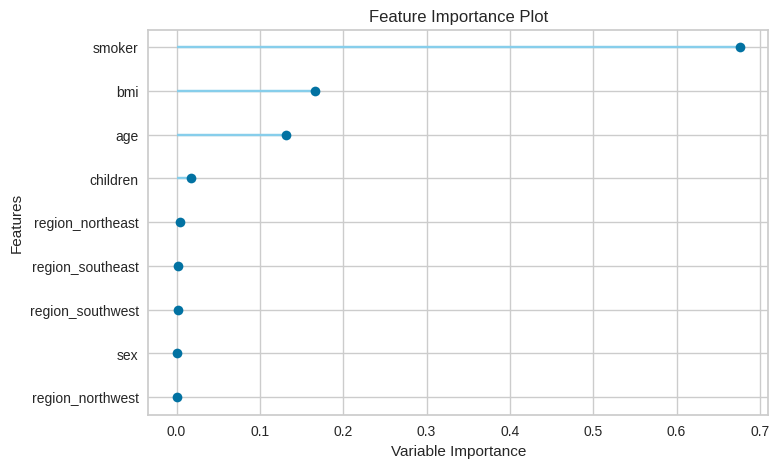

In [64]:
from IPython.display import Image
files.upload()
Image("plot1.png")

Como podem ver, a feature que teve o maior impacto foi se o cliente era fumante ou não, seguido do seu índice de massa corporal (BMI), provando que esses dois fatores têm um grande impacto na saúde de forma geral.



In [ ]:
save_model(final_model, 'insurance')

In [49]:
loaded_model = load_model('insurance')

Transformation Pipeline and Model Successfully Loaded


In [58]:
## testando o modelo
predictions = predict_model(loaded_model, data=data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2187.9750,16096488.4674,4012.0429,0.8902,0.3707,0.2519


## Conclusão do Projeto
Ao longo deste projeto, desenvolvemos um modelo de regressão para prever os custos de planos de saúde com base em uma série de atributos. Nossa análise revelou que o modelo alcançou um erro médio de $2187 em relação aos custos reais. Este valor, considerando a ampla gama e variabilidade dos custos de planos de saúde, pode ser considerado razoável.

A análise dos resultados do modelo nos permitiu entender melhor os fatores que influenciam os custos dos planos de saúde e como esses fatores interagem para determinar os preços finais. Além disso, a capacidade do modelo de prever os custos com um erro médio razoável sugere que ele pode ser útil para seguradoras, prestadores de serviços de saúde e consumidores na tomada de decisões relacionadas a planos de saúde.

No entanto, é importante ressaltar que sempre há margem para melhorias e refinamentos em modelos preditivos. Possíveis áreas para investigação adicional incluem a exploração de novas variáveis ​​e features, a avaliação de diferentes algoritmos de regressão e a implementação de técnicas avançadas de sintonia de hiperparâmetros para melhorar ainda mais o desempenho do modelo.

Em resumo, este projeto fornece uma base sólida para a previsão de custos de planos de saúde e destaca a importância da análise preditiva na tomada de decisões relacionadas a seguros de saúde.